In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
data = pd.read_csv('ratio_values', header=None, names=['valeur'])


Text(0, 0.5, 'Fréquence')

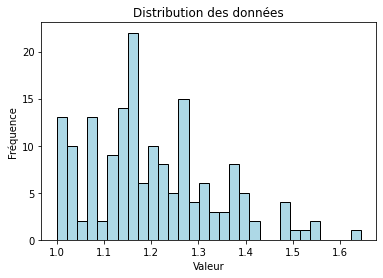

In [ ]:
plt.hist(data['valeur'], bins=30, color='lightblue', edgecolor='black')
plt.title('Distribution des données')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')

Text(0, 0.5, 'Fréquence')

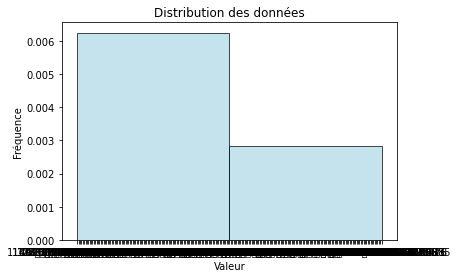

In [52]:
plt.hist(data['valeur'], bins=2, color='lightblue', edgecolor='black', alpha=0.7, density=True)

plt.title('Distribution des données')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')

In [2]:
from ete3 import NCBITaxa
import pandas as pd

ncbi = NCBITaxa()

In [18]:
tenta_df = []
with open('ratio_values', 'r+') as reader:
    for line in reader.readlines():
        line = line.strip()
        if line.startswith('>') == True:
            taxid = line.lstrip('>')
            lineage = ncbi.get_lineage(taxid)
            taxonomy = ncbi.get_taxid_translator(lineage)
            species = ncbi.get_taxid_translator([taxid])[int(taxid)]
            superorder = taxonomy[lineage[18]]
        elif line.startswith('<') == True:
            krab = int(line.split('\t')[1])
            ssxrd = int(line.split('\t')[2])
            zf = int(line.split('\t')[3])
        else:
            tenta_df.append([taxid, species, superorder, line, krab, ssxrd, zf])


In [20]:
plot_df = pd.DataFrame(tenta_df, columns=['Taxid', 'Species name', 'Superorder', 'Ratio', 'KRAB', 'SSXRD', 'ZF'])
pd.set_option("display.max_rows", None)
plot_df.to_csv('plotdata.csv', sep=';')

In [21]:
plot_df

,Taxid,Species name,Superorder,Ratio,KRAB,SSXRD,ZF
0,345717,Pieris macdunnoughi,Endopterygota,1.1683168316831682,0,0,1
1,2961670,Neodiprion virginianus,Endopterygota,1.0822281167108752,0,0,1
2,1163346,Diorhabda sublineata,Endopterygota,1.0818181818181818,0,0,1
3,66420,Papilio xuthus,Endopterygota,1.2019230769230769,0,0,1
4,50390,Diabrotica virgifera virgifera,Endopterygota,1.0132596685082873,0,0,1
5,50390,Diabrotica virgifera virgifera,Endopterygota,1.1638418079096047,0,0,1
6,50390,Diabrotica virgifera virgifera,Endopterygota,1.173134328358209,0,0,1
7,1035111,Leguminivora glycinivorella,Endopterygota,1.2525458248472505,0,0,0
8,1035111,Leguminivora glycinivorella,Endopterygota,1.1995637949836422,0,0,0
9,1035111,Leguminivora glycinivorella,Endopterygota,1.1341991341991342,0,0,0


In [42]:
import pandas as pd
import os

In [16]:
os.system("""awk '/^>/ {sub(">", "", $1); print $1}' blastp_summary.txt > taxid.txt""")

0

In [43]:
from ete3 import NCBITaxa
ncbi = NCBITaxa()

with open('taxid.txt') as reader:
    data_list = [elt for elt in reader.readlines()]

# taxid2name = ncbi.get_taxid_translator(data_list)
# print(taxid2name)

tax_data = []
for elt in data_list:
    lineage = ncbi.get_lineage(elt)
    names = ncbi.get_taxid_translator(lineage)
    organism_data = [int(elt.strip())] + [names[taxid] for taxid in lineage]
    tax_data.append(organism_data)
print(tax_data)

taille_max = max(tax_data, key=len)
taille_max_value = len(taille_max)
taille_max_value

columns = ['Taxid'] + [str(i) for i in range(1, taille_max_value)]

[[151549, 'root', 'cellular organisms', 'Eukaryota', 'Opisthokonta', 'Metazoa', 'Eumetazoa', 'Bilateria', 'Protostomia', 'Ecdysozoa', 'Panarthropoda', 'Arthropoda', 'Mandibulata', 'Pancrustacea', 'Hexapoda', 'Insecta', 'Dicondylia', 'Pterygota', 'Neoptera', 'Endopterygota', 'Amphiesmenoptera', 'Lepidoptera', 'Glossata', 'Neolepidoptera', 'Heteroneura', 'Ditrysia', 'Tineoidea', 'Psychidae', 'Oiketicinae', 'Eumeta', 'Eumeta japonica'], [91411, 'root', 'cellular organisms', 'Eukaryota', 'Opisthokonta', 'Metazoa', 'Eumetazoa', 'Bilateria', 'Protostomia', 'Ecdysozoa', 'Panarthropoda', 'Arthropoda', 'Mandibulata', 'Pancrustacea', 'Hexapoda', 'Insecta', 'Dicondylia', 'Pterygota', 'Neoptera', 'Endopterygota', 'Hymenoptera', 'Apocrita', 'Aculeata', 'Vespoidea', 'Vespidae', 'Polistinae', 'Polistini', 'Polistes', 'Polistes canadensis'], [7011, 'root', 'cellular organisms', 'Eukaryota', 'Opisthokonta', 'Metazoa', 'Eumetazoa', 'Bilateria', 'Protostomia', 'Ecdysozoa', 'Panarthropoda', 'Arthropoda', 

In [44]:
sorted_tax = pd.DataFrame(tax_data, columns=columns)
sorted_tax


,Taxid,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,151549,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,Ecdysozoa,...,Tineoidea,Psychidae,Oiketicinae,Eumeta,Eumeta japonica,None,None,None,None,None
1,91411,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,Ecdysozoa,...,Polistini,Polistes,Polistes canadensis,None,None,None,None,None,None,None
2,7011,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,Ecdysozoa,...,Cyrtacanthacridinae,Schistocerca,Schistocerca nitens,None,None,None,None,None,None,None
3,7446,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,Ecdysozoa,...,Vespa,Vespa mandarinia,None,None,None,None,None,None,None,None
4,1265417,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,Ecdysozoa,...,Callichromatini,Aromia,Aromia moschata,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,7048,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,Ecdysozoa,...,Sitophilus,Sitophilus oryzae,None,None,None,None,None,None,None,None
87,7141,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,Ecdysozoa,...,Apoditrysia,Tortricoidea,Tortricidae,Tortricinae,Archipini,Choristoneura,Choristoneura fumiferana,None,None,None
88,334116,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,Ecdysozoa,...,Obtectomera,Papilionoidea,Nymphalidae,Nymphalinae,Nymphalini,Vanessa,Vanessa tameamea,None,None,None
89,116150,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,Ecdysozoa,...,Obtectomera,Papilionoidea,Nymphalidae,Satyrinae,Satyrini,Parargina,Pararge,Pararge aegeria,None,None


In [45]:
sorted_tax = sorted_tax.sort_values(by=columns)
for index, row in sorted_tax.iterrows():
    last_valid_col = row.last_valid_index()
    sorted_tax.at[index, 'Species name'] = sorted_tax.loc[index, last_valid_col]

In [47]:
last_col_name = sorted_tax.columns[-1]
last_col = sorted_tax.pop(last_col_name)

sorted_tax.insert(0, last_col_name, last_col)
sorted_tax

,Species name,Taxid,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,32,33,34,35
52,Diploptera punctata,6984,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,...,Diploptera punctata,None,None,None,None,None,None,None,None,None
56,Gryllus bimaculatus,6999,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,...,Gryllus,Gryllus bimaculatus,None,None,None,None,None,None,None,None
2,Schistocerca nitens,7011,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,...,Cyrtacanthacridinae,Schistocerca,Schistocerca nitens,None,None,None,None,None,None,None
67,Bemisia tabaci,7038,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,...,Bemisia tabaci,None,None,None,None,None,None,None,None,None
86,Sitophilus oryzae,7048,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,...,Sitophilus,Sitophilus oryzae,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,Brassicogethes aeneus,1431903,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,...,Brassicogethes,Brassicogethes aeneus,None,None,None,None,None,None,None,None
39,Rhamnusium bicolor,1586634,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,...,Rhagiini,Rhamnusium,Rhamnusium bicolor,None,None,None,None,None,None,None
24,Psylliodes chrysocephala,2598218,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,...,Alticini,Psylliodes,Psylliodes chrysocephala,None,None,None,None,None,None,None
72,Neodiprion fabricii,2872261,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,...,None,None,None,None,None,None,None,None,None,None


In [48]:
with open('data/resources/organisms_data') as reader:
    dico = {}
    for line in reader.readlines()[1:]:
        taxid = int(line.split('\t')[1])
        assembly = line.split('\t')[2]
        dico[taxid] = assembly

for index, row in sorted_tax.iterrows():
    taxid = row['Taxid']
    sorted_tax.at[index, 'Accession'] = dico[taxid]

sorted_tax

,Species name,Taxid,1,2,3,4,5,6,7,8,...,27,28,29,30,31,32,33,34,35,Accession
52,Diploptera punctata,6984,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,...,None,None,None,None,None,None,None,None,None,GCA_030220185.1
56,Gryllus bimaculatus,6999,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,...,Gryllus bimaculatus,None,None,None,None,None,None,None,None,GCA_017312745.1
2,Schistocerca nitens,7011,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,...,Schistocerca,Schistocerca nitens,None,None,None,None,None,None,None,GCF_023898315.1
67,Bemisia tabaci,7038,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,...,None,None,None,None,None,None,None,None,None,GCF_001854935.1
86,Sitophilus oryzae,7048,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,...,Sitophilus oryzae,None,None,None,None,None,None,None,None,GCF_002938485.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,Brassicogethes aeneus,1431903,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,...,Brassicogethes aeneus,None,None,None,None,None,None,None,None,GCA_921294245.1
39,Rhamnusium bicolor,1586634,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,...,Rhamnusium,Rhamnusium bicolor,None,None,None,None,None,None,None,GCA_029963845.1
24,Psylliodes chrysocephala,2598218,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,...,Psylliodes,Psylliodes chrysocephala,None,None,None,None,None,None,None,GCA_927349885.1
72,Neodiprion fabricii,2872261,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,...,None,None,None,None,None,None,None,None,None,GCF_021155785.1


In [49]:
last_col_name = sorted_tax.columns[-1]
last_col = sorted_tax.pop(last_col_name)

sorted_tax.insert(0, last_col_name, last_col)

,Accession,Species name,Taxid,1,2,3,4,5,6,7,...,26,27,28,29,30,31,32,33,34,35
52,GCA_030220185.1,Diploptera punctata,6984,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,...,Diploptera punctata,None,None,None,None,None,None,None,None,None
56,GCA_017312745.1,Gryllus bimaculatus,6999,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,...,Gryllus,Gryllus bimaculatus,None,None,None,None,None,None,None,None
2,GCF_023898315.1,Schistocerca nitens,7011,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,...,Cyrtacanthacridinae,Schistocerca,Schistocerca nitens,None,None,None,None,None,None,None
67,GCF_001854935.1,Bemisia tabaci,7038,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,...,Bemisia tabaci,None,None,None,None,None,None,None,None,None
86,GCF_002938485.1,Sitophilus oryzae,7048,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,...,Sitophilus,Sitophilus oryzae,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,GCA_921294245.1,Brassicogethes aeneus,1431903,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,...,Brassicogethes,Brassicogethes aeneus,None,None,None,None,None,None,None,None
39,GCA_029963845.1,Rhamnusium bicolor,1586634,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,...,Rhagiini,Rhamnusium,Rhamnusium bicolor,None,None,None,None,None,None,None
24,GCA_927349885.1,Psylliodes chrysocephala,2598218,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,...,Alticini,Psylliodes,Psylliodes chrysocephala,None,None,None,None,None,None,None
72,GCF_021155785.1,Neodiprion fabricii,2872261,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,...,None,None,None,None,None,None,None,None,None,None


In [55]:
sorted_tax.to_csv('sorted_taxonomy.csv', sep = ';')

In [2]:
import pandas as pd
import sqlite3
import os

In [2]:
# Chargement des données depuis un fichier CSV
donnees = pd.read_csv("plotdata.csv", sep=";")
donnees = donnees.loc[:, ~donnees.columns.str.contains('^Unnamed')]
taxonomy = pd.read_csv("sorted_taxonomy.csv", sep=";")

In [3]:
for index, row in taxonomy.iterrows():
    last_valid_col = taxonomy.iloc[index].last_valid_index()
    taxonomy.at[index, 'Species_name'] = taxonomy.loc[index, last_valid_col]
taxonomy = taxonomy[['Accession', 'Species_name']]
taxonomy.rename(columns={'Species_name': 'Species_name2'}, inplace=True)


In [77]:
# donnees['total_domains'] = 1 + donnees['KRAB'] 
# donnees = donnees[donnees['total_domains'] == 2]
# donnees = donnees[donnees['Superorder'] == 'Endopterygota']
pd.set_option('display.max_rows', None)
donnees

,Taxid,Species_name,Superorder,Protein ID,Bit score,Ratio,KRAB,SSXRD,ZF
0,151549,Eumeta japonica,Endopterygota,GBP65683.1,107.0,1.171961,0,0,1
1,91411,Polistes canadensis,Endopterygota,XP_014615265.1,42.7,1.154054,0,0,1
2,7011,Schistocerca nitens,Polyneoptera,XP_049794263.1,136.0,1.541950,0,0,1
3,7446,Vespa mandarinia,Endopterygota,XP_035725304.1,43.1,1.152406,0,0,1
4,7446,Vespa mandarinia,Endopterygota,XP_035725305.1,43.1,1.152406,0,0,1
5,1265417,Aromia moschata,Endopterygota,KAJ8957942.1,118.0,1.156863,1,0,0
6,58824,Plodia interpunctella,Endopterygota,XP_053622482.1,132.0,1.398305,0,1,1
7,58824,Plodia interpunctella,Endopterygota,XP_053622226.1,145.0,1.643991,0,0,0
8,380381,Callosobruchus analis,Endopterygota,CAI5839466.1,119.0,1.101852,1,1,1
9,1431903,Brassicogethes aeneus,Endopterygota,CAH0549348.1,81.6,1.203540,1,1,0


In [62]:
conn = sqlite3.connect('fusion.sql') 
taxonomy.to_sql("taxonomy", conn, index=False, if_exists='replace')
donnees.to_sql("result", conn, index=False, if_exists='replace')
query = 'SELECT *\
        FROM taxonomy t INNER JOIN result r ON t.Species_name2 == r.Species_name'

df_fusion = pd.read_sql(query, conn)
df_fusion = df_fusion.drop(['Species_name2'], axis = 1)
df_fusion.to_csv('PRDM9_data.csv', index= False, sep=';')
os.remove('fusion.sql')


In [63]:
df_fusion

,Accession,Taxid,Species_name,Superorder,Protein ID,Bit score,Ratio,KRAB,SSXRD,ZF,total_domains
0,GCA_030220185.1,6984,Diploptera punctata,Polyneoptera,KAJ9577987.1,152.0,1.541582,1,1,1,4
1,GCA_013340265.1,36987,Coptotermes formosanus,Polyneoptera,GFG28833.1,144.0,1.384615,1,1,1,4
2,GCA_018342105.1,63699,Gonioctena quinquepunctata,Endopterygota,KAG5867302.1,64.3,1.091681,1,1,1,4
3,GCF_002891405.2,105785,Cryptotermes secundus,Polyneoptera,XP_023708049.2,139.0,1.421268,1,1,1,4
4,GCF_000697945.3,133901,Frankliniella occidentalis,Paraneoptera,XP_026278850.1,133.0,1.231481,1,1,1,4
5,GCF_000697945.3,133901,Frankliniella occidentalis,Paraneoptera,XP_026278869.2,141.0,1.281818,1,1,1,4
6,GCF_000696155.1,136037,Zootermopsis nevadensis,Polyneoptera,XP_021927980.1,135.0,1.386037,1,1,1,4
7,GCA_944317955.1,146774,Callosobruchus chinensis,Endopterygota,CAH7760754.1,36.2,1.067847,1,1,1,4
8,GCF_012932325.1,161013,Thrips palmi,Paraneoptera,XP_034237838.1,129.0,1.252427,1,1,1,4
9,GCA_947858975.1,380381,Callosobruchus analis,Endopterygota,CAI5839466.1,119.0,1.101852,1,1,1,4


In [119]:
### création du df avec une ligne pour chaque espèce et les domaines de chaque protéine

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [111]:
donnees = pd.read_csv("plotdata.csv", sep=";")
donnees = donnees.loc[:, ~donnees.columns.str.contains('^Unnamed')]
donnees['boolZF'] = donnees['ZF'].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
#### Une ligne par organise par présence/absence de PRDM9

In [112]:
donnees['All_domains'] = ((donnees['SET'] + donnees['KRAB'] + donnees['SSXRD'] + donnees['boolZF'] == 4)).astype(int)
donnees['SET+KRAB+SSXRD'] = ((donnees['All_domains'] == 0) & (donnees['KRAB'] + donnees['SSXRD'] == 2)).astype(int)
donnees['SET+KRAB+ZF'] = ((donnees['All_domains'] == 0) & (donnees['KRAB'] + donnees['boolZF'] == 2)).astype(int)
donnees['SET+KRAB'] = ((donnees['All_domains'] == 0) & (donnees['SET+KRAB+ZF'] == 0) & (donnees['SET+KRAB+SSXRD'] == 0) & (donnees['KRAB'] == 1)).astype(int)
donnees['KRAB+ZF'] = ((donnees['All_domains'] == 0) & (donnees['SET+KRAB+ZF'] == 0) & (donnees['SET+KRAB+SSXRD'] == 0) & (donnees['KRAB'] == 1) & (donnees['boolZF'] == 1)).astype(int)

donnees['c PRDM9'] = False
for index, row in donnees.iterrows():
    if row['Best_Match'] == 'PRDM9':
        donnees.at[index, 'c PRDM9'] = True 
    else:
        donnees.at[index, 'c PRDM9'] = False 


In [113]:
synth = donnees.groupby(['Taxid', 'Species_name', 'Superorder', 'c PRDM9']).agg({
    'All_domains': lambda x: list(donnees.loc[x.index, 'Protein ID'][donnees['All_domains'] == 1]),
    'SET+KRAB+SSXRD': lambda x: list(donnees.loc[x.index, 'Protein ID'][donnees['SET+KRAB+SSXRD'] == 1]),
    'SET+KRAB+ZF': lambda x: list(donnees.loc[x.index, 'Protein ID'][donnees['SET+KRAB+ZF'] == 1]),
    'SET+KRAB': lambda x: list(donnees.loc[x.index, 'Protein ID'][donnees['SET+KRAB'] == 1]),
    'KRAB+ZF': lambda x: list(donnees.loc[x.index, 'Protein ID'][donnees['KRAB+ZF'] == 1])
}).reset_index()

synth['All_domains nb'] = synth['All_domains'].apply(len)
synth['SET+KRAB+SSXRD nb'] = synth['SET+KRAB+SSXRD'].apply(len)
synth['SET+KRAB+ZF nb'] = synth['SET+KRAB+ZF'].apply(len)
synth['SET+KRAB nb'] = synth['SET+KRAB'].apply(len)
synth['KRAB+ZF nb'] = synth['KRAB+ZF'].apply(len)


,Taxid,Species_name,Superorder,c PRDM9,All_domains,SET+KRAB+SSXRD,SET+KRAB+ZF,SET+KRAB,KRAB+ZF,All_domains nb,SET+KRAB+SSXRD nb,SET+KRAB+ZF nb,SET+KRAB nb,KRAB+ZF nb
0,6978,Periplaneta americana,Polyneoptera,False,[],[],[],[],[],0,0,0,0,0
1,6984,Diploptera punctata,Polyneoptera,False,[],[],[],[],[],0,0,0,0,0
2,6984,Diploptera punctata,Polyneoptera,True,[KAJ9577987.1],[],[],[],[],1,0,0,0,0
3,6999,Gryllus bimaculatus,Polyneoptera,False,[],[],[],[],[],0,0,0,0,0
4,6999,Gryllus bimaculatus,Polyneoptera,True,[],[],[],[],[],0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,2872261,Neodiprion fabricii,Endopterygota,False,[],[],[],[],[],0,0,0,0,0
428,2872261,Neodiprion fabricii,Endopterygota,True,[],[],[],[],[],0,0,0,0,0
429,2921223,Anthonomus grandis grandis,Endopterygota,False,[],[],[],[],[],0,0,0,0,0
430,2961670,Neodiprion virginianus,Endopterygota,False,[],[],[],[],[],0,0,0,0,0


In [114]:
nombre_ZF_sup_5 = donnees[donnees['ZF'] > 5].groupby(['Taxid', 'Species_name','c PRDM9']).size().reset_index(name='5+ ZF')
nombre_ZF_sup_5
synth = synth.merge(nombre_ZF_sup_5, on=['Taxid', 'Species_name', 'c PRDM9'], how='left')
synth['5+ ZF'] = synth['5+ ZF'].fillna(0).astype(int)

,Taxid,Species_name,Superorder,c PRDM9,All_domains,SET+KRAB+SSXRD,SET+KRAB+ZF,SET+KRAB,KRAB+ZF,All_domains nb,SET+KRAB+SSXRD nb,SET+KRAB+ZF nb,SET+KRAB nb,KRAB+ZF nb,5+ ZF
0,6978,Periplaneta americana,Polyneoptera,False,[],[],[],[],[],0,0,0,0,0,2
1,6984,Diploptera punctata,Polyneoptera,False,[],[],[],[],[],0,0,0,0,0,0
2,6984,Diploptera punctata,Polyneoptera,True,[KAJ9577987.1],[],[],[],[],1,0,0,0,0,0
3,6999,Gryllus bimaculatus,Polyneoptera,False,[],[],[],[],[],0,0,0,0,0,1
4,6999,Gryllus bimaculatus,Polyneoptera,True,[],[],[],[],[],0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,2872261,Neodiprion fabricii,Endopterygota,False,[],[],[],[],[],0,0,0,0,0,1
428,2872261,Neodiprion fabricii,Endopterygota,True,[],[],[],[],[],0,0,0,0,0,0
429,2921223,Anthonomus grandis grandis,Endopterygota,False,[],[],[],[],[],0,0,0,0,0,5
430,2961670,Neodiprion virginianus,Endopterygota,False,[],[],[],[],[],0,0,0,0,0,1


In [115]:
nombre_lignes_SET = donnees[donnees['SET'] == 1].groupby(['Taxid', 'Species_name','c PRDM9']).size().reset_index(name='Nb_SET')
synth = synth.merge(nombre_lignes_SET, on=['Taxid', 'Species_name','c PRDM9'], how='left')
synth['Nb_SET'] = synth['Nb_SET'].fillna(0).astype(int)
synth = synth[['Taxid', 'Species_name','Superorder','c PRDM9', 'Nb_SET', 'All_domains nb', 'All_domains', 'SET+KRAB+SSXRD nb', 'SET+KRAB+SSXRD', 'SET+KRAB+ZF nb', 'SET+KRAB+ZF', 'KRAB+ZF nb', 'KRAB+ZF', '5+ ZF']]

In [118]:
taxonomy = pd.read_csv('sorted_taxonomy.csv', sep= ';')
merge= pd.merge(synth, taxonomy, left_on='Species_name', right_on='Species name', how='inner')
merge = merge.loc[:, ~merge.columns.str.contains('^Unnamed')]

,Taxid_x,Species_name,Superorder,c PRDM9,Nb_SET,All_domains nb,All_domains,SET+KRAB+SSXRD nb,SET+KRAB+SSXRD,SET+KRAB+ZF nb,SET+KRAB+ZF,KRAB+ZF nb,KRAB+ZF,5+ ZF,Accession,Species name,Taxid_y,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,6978,Periplaneta americana,Polyneoptera,False,2,0,[],0,[],0,[],0,[],2,GCA_025594305.2,Periplaneta americana,6978,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,Ecdysozoa,Panarthropoda,Arthropoda,Mandibulata,Pancrustacea,Hexapoda,Insecta,Dicondylia,Pterygota,Neoptera,Polyneoptera,Dictyoptera,Blattodea,Blattoidea,Blattidae,Blattinae,Periplaneta,Periplaneta americana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6984,Diploptera punctata,Polyneoptera,False,9,0,[],0,[],0,[],0,[],0,GCA_030220185.1,Diploptera punctata,6984,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,Ecdysozoa,Panarthropoda,Arthropoda,Mandibulata,Pancrustacea,Hexapoda,Insecta,Dicondylia,Pterygota,Neoptera,Polyneoptera,Dictyoptera,Blattodea,Blaberoidea,Blaberidae,Diplopterinae,Diploptera,Diploptera punctata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6984,Diploptera punctata,Polyneoptera,True,1,1,[KAJ9577987.1],0,[],0,[],0,[],0,GCA_030220185.1,Diploptera punctata,6984,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,Ecdysozoa,Panarthropoda,Arthropoda,Mandibulata,Pancrustacea,Hexapoda,Insecta,Dicondylia,Pterygota,Neoptera,Polyneoptera,Dictyoptera,Blattodea,Blaberoidea,Blaberidae,Diplopterinae,Diploptera,Diploptera punctata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6999,Gryllus bimaculatus,Polyneoptera,False,13,0,[],0,[],0,[],0,[],1,GCA_017312745.1,Gryllus bimaculatus,6999,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,Ecdysozoa,Panarthropoda,Arthropoda,Mandibulata,Pancrustacea,Hexapoda,Insecta,Dicondylia,Pterygota,Neoptera,Polyneoptera,Orthoptera,Ensifera,Gryllidea,Grylloidea,Gryllidae,Gryllinae,Gryllus,Gryllus bimaculatus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6999,Gryllus bimaculatus,Polyneoptera,True,1,0,[],0,[],0,[],0,[],1,GCA_017312745.1,Gryllus bimaculatus,6999,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,Ecdysozoa,Panarthropoda,Arthropoda,Mandibulata,Pancrustacea,Hexapoda,Insecta,Dicondylia,Pterygota,Neoptera,Polyneoptera,Orthoptera,Ensifera,Gryllidea,Grylloidea,Gryllidae,Gryllinae,Gryllus,Gryllus bimaculatus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,2872261,Neodiprion fabricii,Endopterygota,False,16,0,[],0,[],0,[],0,[],1,GCF_021155785.1,Neodiprion fabricii,2872261,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,Ecdysozoa,Panarthropoda,Arthropoda,Mandibulata,Pancrustacea,Hexapoda,Insecta,Dicondylia,Pterygota,Neoptera,Endopterygota,Hymenoptera,Tenthredinoidea,Diprionidae,Diprioninae,Neodiprion,Neodiprion fabricii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
428,2872261,Neodiprion fabricii,Endopterygota,True,1,0,[],0,[],0,[],0,[],0,GCF_021155785.1,Neodiprion fabricii,2872261,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,Ecdysozoa,Panarthropoda,Arthropoda,Mandibulata,Pancrustacea,Hexapoda,Insecta,Dicondylia,Pterygota,Neoptera,Endopterygota,Hymenoptera,Tenthredinoidea,Diprionidae,Diprioninae,Neodiprion,Neodiprion fabricii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
429,2921223,Anthonomus grandis grandis,Endopterygota,False,19,0,[],0,[],0,[],0,[],5,GCF_022605725.1,Anthonomus grandis grandis,2921223,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,Ecdysozoa,Panarthropoda,Arthropoda,Mandibulata,Pancrustacea,Hexapoda,Insecta,Dicondyl

In [120]:
merge

,Taxid_x,Species_name,Superorder,c PRDM9,Nb_SET,All_domains nb,All_domains,SET+KRAB+SSXRD nb,SET+KRAB+SSXRD,SET+KRAB+ZF nb,SET+KRAB+ZF,KRAB+ZF nb,KRAB+ZF,5+ ZF,Accession,Species name,Taxid_y,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,6978,Periplaneta americana,Polyneoptera,False,2,0,[],0,[],0,[],0,[],2,GCA_025594305.2,Periplaneta americana,6978,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,Ecdysozoa,Panarthropoda,Arthropoda,Mandibulata,Pancrustacea,Hexapoda,Insecta,Dicondylia,Pterygota,Neoptera,Polyneoptera,Dictyoptera,Blattodea,Blattoidea,Blattidae,Blattinae,Periplaneta,Periplaneta americana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6984,Diploptera punctata,Polyneoptera,False,9,0,[],0,[],0,[],0,[],0,GCA_030220185.1,Diploptera punctata,6984,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,Ecdysozoa,Panarthropoda,Arthropoda,Mandibulata,Pancrustacea,Hexapoda,Insecta,Dicondylia,Pterygota,Neoptera,Polyneoptera,Dictyoptera,Blattodea,Blaberoidea,Blaberidae,Diplopterinae,Diploptera,Diploptera punctata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6984,Diploptera punctata,Polyneoptera,True,1,1,[KAJ9577987.1],0,[],0,[],0,[],0,GCA_030220185.1,Diploptera punctata,6984,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,Ecdysozoa,Panarthropoda,Arthropoda,Mandibulata,Pancrustacea,Hexapoda,Insecta,Dicondylia,Pterygota,Neoptera,Polyneoptera,Dictyoptera,Blattodea,Blaberoidea,Blaberidae,Diplopterinae,Diploptera,Diploptera punctata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6999,Gryllus bimaculatus,Polyneoptera,False,13,0,[],0,[],0,[],0,[],1,GCA_017312745.1,Gryllus bimaculatus,6999,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,Ecdysozoa,Panarthropoda,Arthropoda,Mandibulata,Pancrustacea,Hexapoda,Insecta,Dicondylia,Pterygota,Neoptera,Polyneoptera,Orthoptera,Ensifera,Gryllidea,Grylloidea,Gryllidae,Gryllinae,Gryllus,Gryllus bimaculatus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6999,Gryllus bimaculatus,Polyneoptera,True,1,0,[],0,[],0,[],0,[],1,GCA_017312745.1,Gryllus bimaculatus,6999,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,Ecdysozoa,Panarthropoda,Arthropoda,Mandibulata,Pancrustacea,Hexapoda,Insecta,Dicondylia,Pterygota,Neoptera,Polyneoptera,Orthoptera,Ensifera,Gryllidea,Grylloidea,Gryllidae,Gryllinae,Gryllus,Gryllus bimaculatus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,7009,Schistocerca americana,Polyneoptera,False,8,0,[],0,[],0,[],0,[],4,GCF_021461395.2,Schistocerca americana,7009,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,Ecdysozoa,Panarthropoda,Arthropoda,Mandibulata,Pancrustacea,Hexapoda,Insecta,Dicondylia,Pterygota,Neoptera,Polyneoptera,Orthoptera,Caelifera,Acrididea,Acridomorpha,Acridoidea,Acrididae,Cyrtacanthacridinae,Schistocerca,Schistocerca americana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7010,Schistocerca gregaria,Polyneoptera,False,12,0,[],0,[],0,[],0,[],5,GCF_023897955.1,Schistocerca gregaria,7010,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,Ecdysozoa,Panarthropoda,Arthropoda,Mandibulata,Pancrustacea,Hexapoda,Insecta,Dicondylia,Pterygota,Neoptera,Polyneoptera,Orthoptera,Caelifera,Acrididea,Acridomorpha,Acridoidea,Acrididae,Cyrtacanthacridinae,Schistocerca,Schistocerca gregaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7011,Schistocerca nitens,Polyneoptera,False,7,0,[],0,[],0,[],0,[],4,GCF_023898315.1,Schistocerca nitens,7011,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,Ecdysozoa,Panarthropoda,Arthropoda,Mandibulata,Pancrustacea,Hexapoda,Insecta,Dicondylia,Pterygota,Neoptera,Polyneoptera,Orthoptera,Caelifera,Acrididea,Acridomorpha,Acridoidea,Acrididae,Cyrtacanthacridinae,Schistocerca,Schistocerca nitens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,7011,Schist

In [ ]:
### Une ligne par organisme mais plus de colonnes
import pandas as pd

In [142]:
donnees = pd.read_csv("plotdata.csv", sep=";")
donnees = donnees.loc[:, ~donnees.columns.str.contains('^Unnamed')]
donnees['boolZF'] = donnees['ZF'].apply(lambda x: 0 if x == 0 else 1)

In [144]:
for index,row in donnees.iterrows():
    if row['Best_Match'] == 'PRDM9':
        donnees.loc[index,'All_domains'] = ((row['SET'] + row['KRAB'] + row['SSXRD'] + row['boolZF'] == 4))
        donnees.loc[index,'SET+KRAB+SSXRD'] = ((row['All_domains'] == 0) & (row['KRAB'] + row['SSXRD'] == 2))
        donnees.loc[index,'SET+KRAB+ZF'] = ((row['All_domains'] == 0) & (row['KRAB'] + row['boolZF'] == 2))
        donnees.loc[index,'SET+KRAB'] = ((row['All_domains'] == 0) & (row['SET+KRAB+ZF'] == 0) & (row['SET+KRAB+SSXRD'] == 0) & (row['KRAB'] == 1))
        donnees.loc[index,'KRAB+ZF'] = ((row['All_domains'] == 0) & (row['SET+KRAB+ZF'] == 0) & (row['SET+KRAB+SSXRD'] == 0) & (row['KRAB'] == 1) & (row['boolZF'] == 1))
    else:
        donnees.loc[index,'Not_PRDM9_All_domains'] = ((row['SET'] + row['KRAB'] + row['SSXRD'] + row['boolZF'] == 4))
        donnees.loc[index,'Not_PRDM9_SET+KRAB+SSXRD'] = ((row['Not_PRDM9_All_domains'] == 0) & (row['KRAB'] + row['SSXRD'] == 2))
        donnees.loc[index,'Not_PRDM9_SET+KRAB+ZF'] = ((row['Not_PRDM9_All_domains'] == 0) & (row['KRAB'] + row['boolZF'] == 2))
        donnees.loc[index,'Not_PRDM9_SET+KRAB'] = ((row['Not_PRDM9_All_domains'] == 0) & (row['Not_PRDM9_SET+KRAB+ZF'] == 0) & (row['Not_PRDM9_SET+KRAB+SSXRD'] == 0) & (row['KRAB'] == 1))
        donnees.loc[index,'Not_PRDM9_KRAB+ZF'] = ((row['Not_PRDM9_All_domains'] == 0) & (row['Not_PRDM9_SET+KRAB+ZF'] == 0) & (row['Not_PRDM9_SET+KRAB+SSXRD'] == 0) & (row['KRAB'] == 1) & (row['boolZF'] == 1))

KeyError: 'Not_PRDM9_SET+KRAB+ZF'

In [150]:
import pandas as pd
donnees = pd.read_csv("plotdata.csv", sep=";")
donnees = donnees.loc[:, ~donnees.columns.str.contains('^Unnamed')]
donnees['boolZF'] = donnees['ZF'].apply(lambda x: 0 if x == 0 else 1)

In [151]:
donnees['All_domains'] = ((donnees['SET'] + donnees['KRAB'] + donnees['SSXRD'] + donnees['boolZF'] == 4)).astype(int)
donnees['SET+KRAB+SSXRD'] = ((donnees['All_domains'] == 0) & (donnees['KRAB'] + donnees['SSXRD'] == 2)).astype(int)
donnees['SET+KRAB+ZF'] = ((donnees['All_domains'] == 0) & (donnees['KRAB'] + donnees['boolZF'] == 2)).astype(int)
donnees['SET+KRAB'] = ((donnees['All_domains'] == 0) & (donnees['SET+KRAB+ZF'] == 0) & (donnees['SET+KRAB+SSXRD'] == 0) & (donnees['KRAB'] == 1)).astype(int)
donnees['KRAB+ZF'] = ((donnees['All_domains'] == 0) & (donnees['SET+KRAB+ZF'] == 0) & (donnees['SET+KRAB+SSXRD'] == 0) & (donnees['KRAB'] == 1) & (donnees['boolZF'] == 1)).astype(int)

donnees['PRDM9'] = False
for index, row in donnees.iterrows():
    if row['Best_Match'] == 'PRDM9':
        donnees.at[index, 'PRDM9'] = True 
    else:
        donnees.at[index, 'PRDM9'] = False 


In [153]:
prdm9 = donnees[donnees['PRDM9'] == True]


In [154]:
synth = donnees.groupby(['Taxid', 'Species_name', 'Superorder']).agg({
    'All_domains': lambda x: list(donnees.loc[x.index, 'Protein ID'][donnees['All_domains'] == 1]),
    'SET+KRAB+SSXRD': lambda x: list(donnees.loc[x.index, 'Protein ID'][donnees['SET+KRAB+SSXRD'] == 1]),
    'SET+KRAB+ZF': lambda x: list(donnees.loc[x.index, 'Protein ID'][donnees['SET+KRAB+ZF'] == 1]),
    'SET+KRAB': lambda x: list(donnees.loc[x.index, 'Protein ID'][donnees['SET+KRAB'] == 1]),
    'KRAB+ZF': lambda x: list(donnees.loc[x.index, 'Protein ID'][donnees['KRAB+ZF'] == 1])
}).reset_index()

synth['All_domains nb'] = synth['All_domains'].apply(len)
synth['SET+KRAB+SSXRD nb'] = synth['SET+KRAB+SSXRD'].apply(len)
synth['SET+KRAB+ZF nb'] = synth['SET+KRAB+ZF'].apply(len)
synth['SET+KRAB nb'] = synth['SET+KRAB'].apply(len)
synth['KRAB+ZF nb'] = synth['KRAB+ZF'].apply(len)

synth

,Taxid,Species_name,Superorder,All_domains,SET+KRAB+SSXRD,SET+KRAB+ZF,SET+KRAB,KRAB+ZF,All_domains nb,SET+KRAB+SSXRD nb,SET+KRAB+ZF nb,SET+KRAB nb,KRAB+ZF nb
0,6978,Periplaneta americana,Polyneoptera,[],[],[],[],[],0,0,0,0,0
1,6984,Diploptera punctata,Polyneoptera,[KAJ9577987.1],[],[],[],[],1,0,0,0,0
2,6999,Gryllus bimaculatus,Polyneoptera,[],[],[],[],[],0,0,0,0,0
3,7009,Schistocerca americana,Polyneoptera,[],[],[],[],[],0,0,0,0,0
4,7010,Schistocerca gregaria,Polyneoptera,[],[],[],[],[],0,0,0,0,0
5,7011,Schistocerca nitens,Polyneoptera,[],[],[],[],[],0,0,0,0,0
6,7029,Acyrthosiphon pisum,Paraneoptera,[],[],[],[],[],0,0,0,0,0
7,7038,Bemisia tabaci,Paraneoptera,[],[],[],[],[],0,0,0,0,0
8,7048,Sitophilus oryzae,Endopterygota,[],[],[],[],[],0,0,0,0,0
9,7054,Photinus pyralis,Endopterygota,[],[],[],[],[],0,0,0,0,0
